In [1]:
import os
import json
import string
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

warnings.filterwarnings(action='ignore', message='numpy.dtype size changed')
warnings.filterwarnings(action='ignore', message='compiletime version 3.5 of module')

if not 'workbookDir' in globals():
    workbookDir = os.getcwd()
os.chdir(os.path.split(workbookDir)[0])

%load_ext autoreload
%autoreload 2
%matplotlib inline

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [5]:
from synthesized.testing import synthetic_distributions as syn_dist
from synthesized.testing.evaluate_sparsity_regimes import missing_patterns, synthesize_and_plot_results

ModuleNotFoundError: No module named 'synthesized'

In [3]:
def plot_dist(data: pd.DataFrame, data_missing: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('missing')
    sns.scatterplot(x='x', y='y', data=data, ax=ax1, color=sns.color_palette()[0])
    sns.scatterplot(x='x', y='y', data=data_missing, ax=ax2, color=sns.color_palette()[1])
    plt.show()
    
def plot_heatmap(data1: pd.DataFrame, data2: pd.DataFrame):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
    ax1.set_title('orig')
    ax2.set_title('synth')
    
    crosstab1 = pd.crosstab(data1['x'], columns=[data1['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab1, vmin=0.0, vmax=1.0, ax=ax1)
    
    crosstab2 = pd.crosstab(data2['x'], columns=[data2['y']]).apply(lambda r: r/r.sum(), axis=1)
    sns.heatmap(crosstab2, vmin=0.0, vmax=1.0, ax=ax2)
            

============= MCAR =============
Prop. NaNs:
x    0.5018
y    0.4952
dtype: float64


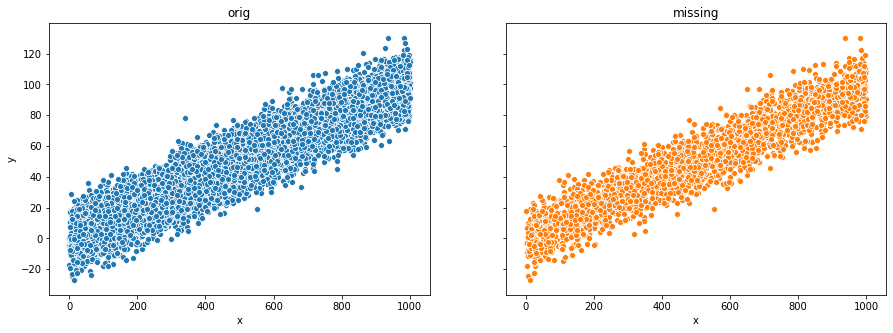

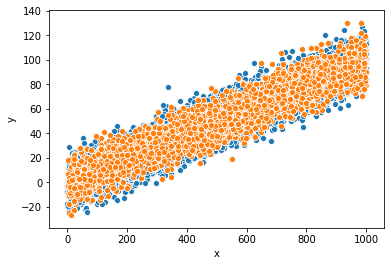

============= MAR =============
Prop. NaNs:
x    0.5000
y    0.4999
dtype: float64


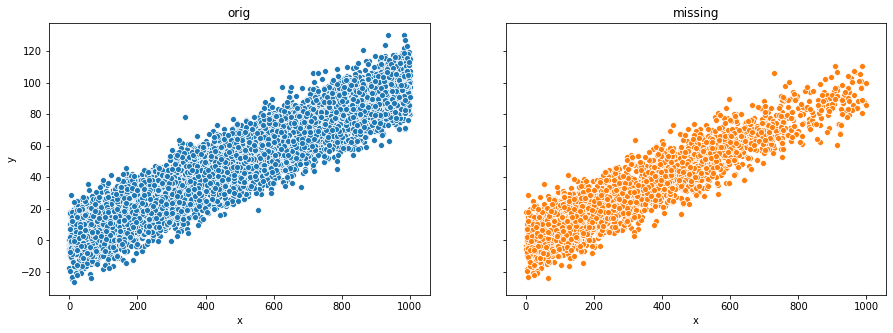

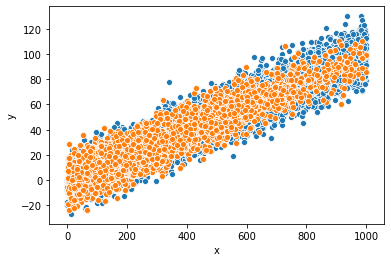

============= MNAR =============
Prop. NaNs:
x    0.5001
y    0.4998
dtype: float64


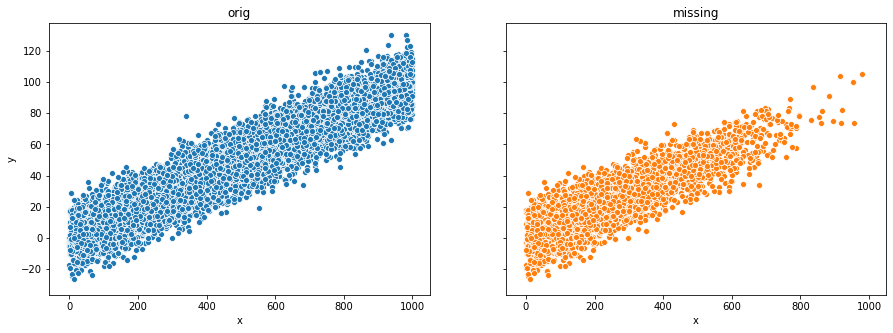

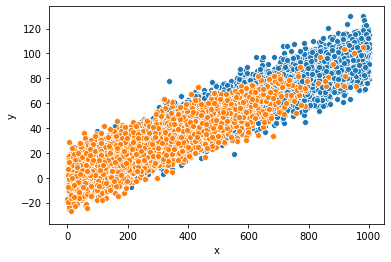

In [4]:
# data = syn_dist.create_gauss_ball(x_mean=1000, x_std=100, y_mean=100, y_std=10, size=10000)
data = syn_dist.create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)

keep_ratio = 0.5
std_noise = 2.

# MCAR
print('============= MCAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MCAR')

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MAR
print('============= MAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()


# MNAR
print('============= MNAR =============')
data_missing = missing_patterns(data, keep_ratio=keep_ratio, mechanism='MNAR', std_noise=std_noise)

print('Prop. NaNs:')
print(np.sum(data_missing.isna()) / len(data_missing) )
plot_dist(data, data_missing)

sns.scatterplot(x='x', y='y', data=data, color=sns.color_palette()[0])
sns.scatterplot(x='x', y='y', data=data_missing, color=sns.color_palette()[1])
plt.show()

In [5]:
from synthesized.testing import UtilityTesting
from synthesized import HighDimSynthesizer

from scipy.stats import ks_2samp

def max_correlation_distance(orig, synth):
    return np.abs((orig.corr() - synth.corr()).to_numpy()).max()

def mean_ks_distance(orig, synth):
    distances = [ks_2samp(orig[col], synth[col])[0] for col in orig.columns]
    return np.mean(distances)

def max_ks_distance(orig, synth):
    distances = [ks_2samp(orig[col], synth[col])[0] for col in orig.columns]
    return np.max(distances)



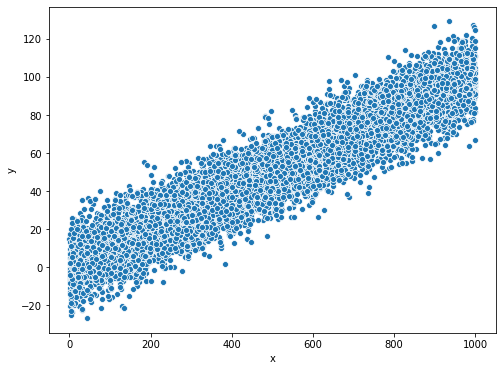

Computed results for 75% NaNs for MCAR. Took 70.30s.
Computed results for 70% NaNs for MCAR. Took 80.77s.
Computed results for 65% NaNs for MCAR. Took 81.27s.
Computed results for 60% NaNs for MCAR. Took 74.37s.
Computed results for 55% NaNs for MCAR. Took 101.74s.
Computed results for 50% NaNs for MCAR. Took 95.20s.
Computed results for 45% NaNs for MCAR. Took 119.03s.
Computed results for 40% NaNs for MCAR. Took 68.39s.
Computed results for 35% NaNs for MCAR. Took 67.20s.
Computed results for 30% NaNs for MCAR. Took 68.20s.
Computed results for 25% NaNs for MCAR. Took 65.43s.
Computed results for 20% NaNs for MCAR. Took 71.17s.
Computed results for 15% NaNs for MCAR. Took 65.24s.
Computed results for 10% NaNs for MCAR. Took 96.02s.
Computed results for 5% NaNs for MCAR. Took 81.24s.
Computed results for 0% NaNs for MCAR. Took 86.26s.


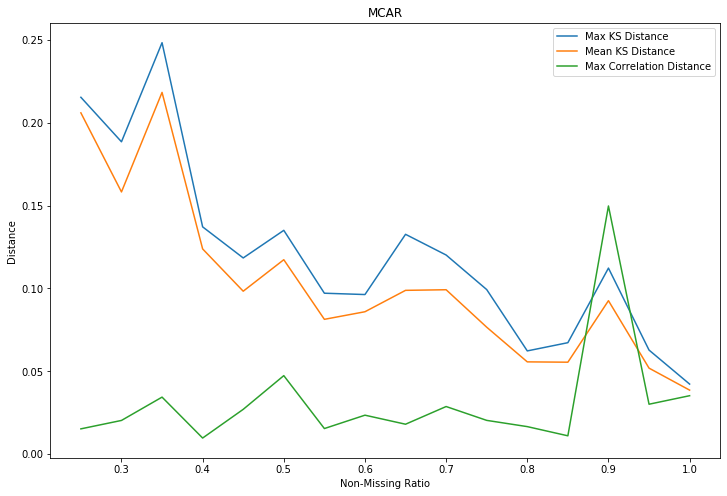

Computed results for 75% NaNs for MAR. Took 87.58s.
Computed results for 70% NaNs for MAR. Took 79.18s.
Computed results for 65% NaNs for MAR. Took 68.73s.
Computed results for 60% NaNs for MAR. Took 66.58s.
Computed results for 55% NaNs for MAR. Took 78.17s.
Computed results for 50% NaNs for MAR. Took 77.16s.
Computed results for 45% NaNs for MAR. Took 64.59s.
Computed results for 40% NaNs for MAR. Took 62.00s.
Computed results for 35% NaNs for MAR. Took 61.76s.
Computed results for 30% NaNs for MAR. Took 61.82s.
Computed results for 25% NaNs for MAR. Took 61.65s.
Computed results for 20% NaNs for MAR. Took 61.72s.
Computed results for 15% NaNs for MAR. Took 66.07s.
Computed results for 10% NaNs for MAR. Took 62.30s.
Computed results for 5% NaNs for MAR. Took 68.93s.
Computed results for 0% NaNs for MAR. Took 60.36s.


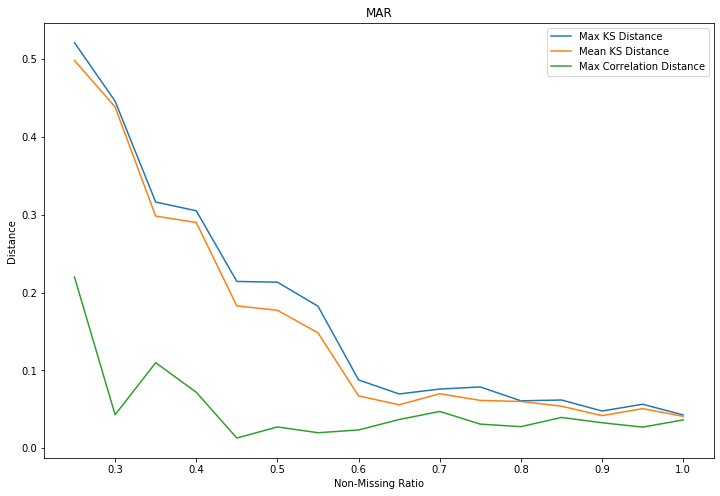

Computed results for 75% NaNs for MNAR. Took 64.56s.
Computed results for 70% NaNs for MNAR. Took 69.19s.
Computed results for 65% NaNs for MNAR. Took 69.59s.
Computed results for 60% NaNs for MNAR. Took 71.63s.
Computed results for 55% NaNs for MNAR. Took 90.19s.
Computed results for 50% NaNs for MNAR. Took 90.75s.
Computed results for 45% NaNs for MNAR. Took 76.69s.
Computed results for 40% NaNs for MNAR. Took 92.62s.
Computed results for 35% NaNs for MNAR. Took 86.37s.
Computed results for 30% NaNs for MNAR. Took 93.43s.
Computed results for 25% NaNs for MNAR. Took 76.01s.
Computed results for 20% NaNs for MNAR. Took 86.18s.
Computed results for 15% NaNs for MNAR. Took 95.91s.
Computed results for 10% NaNs for MNAR. Took 73.11s.
Computed results for 5% NaNs for MNAR. Took 76.01s.
Computed results for 0% NaNs for MNAR. Took 57.52s.


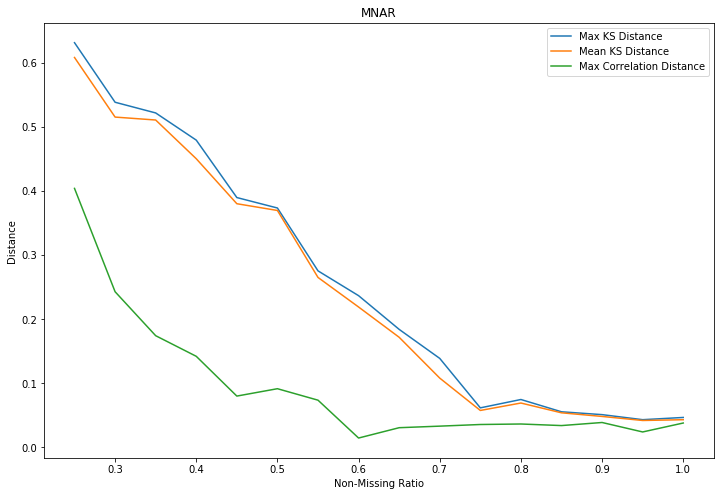

In [8]:
data = syn_dist.create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data)
plt.show()

results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=2500, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


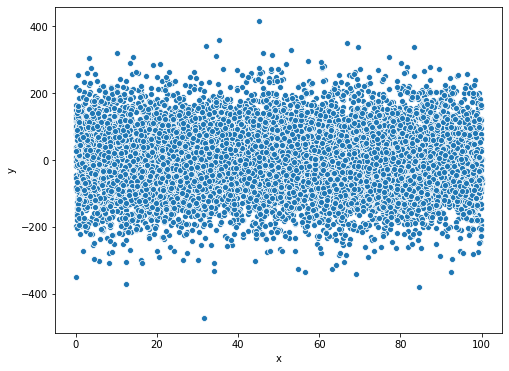

Computed results for 75% NaNs for MCAR. Took 98.84s.
Computed results for 70% NaNs for MCAR. Took 85.40s.
Computed results for 65% NaNs for MCAR. Took 63.05s.
Computed results for 60% NaNs for MCAR. Took 88.82s.
Computed results for 55% NaNs for MCAR. Took 82.61s.
Computed results for 50% NaNs for MCAR. Took 69.74s.
Computed results for 45% NaNs for MCAR. Took 73.61s.
Computed results for 40% NaNs for MCAR. Took 103.32s.
Computed results for 35% NaNs for MCAR. Took 74.71s.
Computed results for 30% NaNs for MCAR. Took 68.73s.
Computed results for 25% NaNs for MCAR. Took 71.52s.
Computed results for 20% NaNs for MCAR. Took 65.94s.
Computed results for 15% NaNs for MCAR. Took 65.66s.
Computed results for 10% NaNs for MCAR. Took 91.42s.
Computed results for 5% NaNs for MCAR. Took 82.66s.
Computed results for 0% NaNs for MCAR. Took 56.28s.


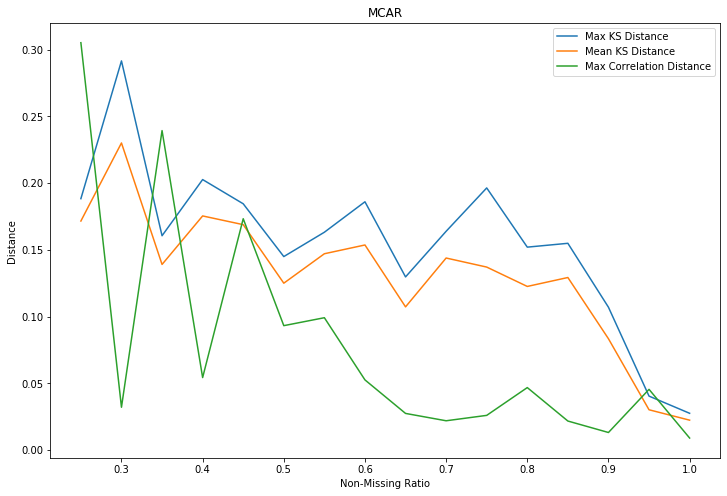

Computed results for 75% NaNs for MAR. Took 65.43s.
Computed results for 70% NaNs for MAR. Took 79.82s.
Computed results for 65% NaNs for MAR. Took 90.49s.
Computed results for 60% NaNs for MAR. Took 74.42s.
Computed results for 55% NaNs for MAR. Took 80.52s.
Computed results for 50% NaNs for MAR. Took 77.75s.
Computed results for 45% NaNs for MAR. Took 93.97s.
Computed results for 40% NaNs for MAR. Took 98.16s.
Computed results for 35% NaNs for MAR. Took 92.81s.
Computed results for 30% NaNs for MAR. Took 79.83s.
Computed results for 25% NaNs for MAR. Took 73.16s.
Computed results for 20% NaNs for MAR. Took 83.07s.
Computed results for 15% NaNs for MAR. Took 63.03s.
Computed results for 10% NaNs for MAR. Took 73.88s.
Computed results for 5% NaNs for MAR. Took 75.32s.
Computed results for 0% NaNs for MAR. Took 94.02s.


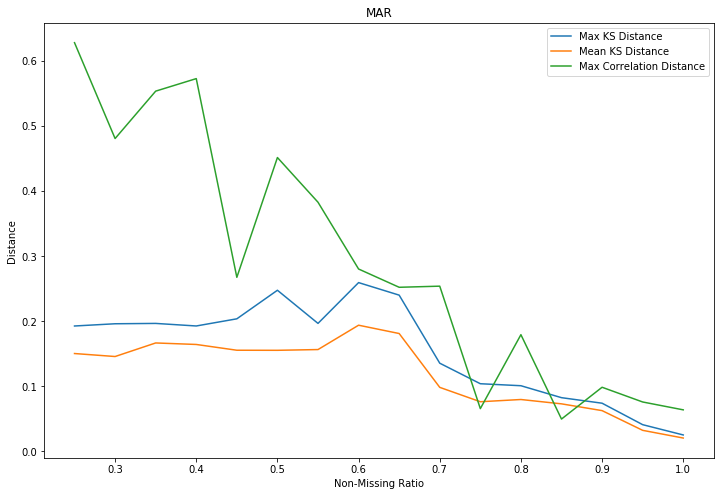

Computed results for 75% NaNs for MNAR. Took 131.41s.
Computed results for 70% NaNs for MNAR. Took 71.76s.
Computed results for 65% NaNs for MNAR. Took 68.14s.
Computed results for 60% NaNs for MNAR. Took 95.53s.
Computed results for 55% NaNs for MNAR. Took 74.39s.
Computed results for 50% NaNs for MNAR. Took 63.97s.
Computed results for 45% NaNs for MNAR. Took 89.46s.
Computed results for 40% NaNs for MNAR. Took 112.88s.
Computed results for 35% NaNs for MNAR. Took 80.65s.
Computed results for 30% NaNs for MNAR. Took 82.41s.
Computed results for 25% NaNs for MNAR. Took 80.48s.
Computed results for 20% NaNs for MNAR. Took 80.77s.
Computed results for 15% NaNs for MNAR. Took 74.40s.
Computed results for 10% NaNs for MNAR. Took 80.78s.
Computed results for 5% NaNs for MNAR. Took 85.89s.
Computed results for 0% NaNs for MNAR. Took 80.25s.


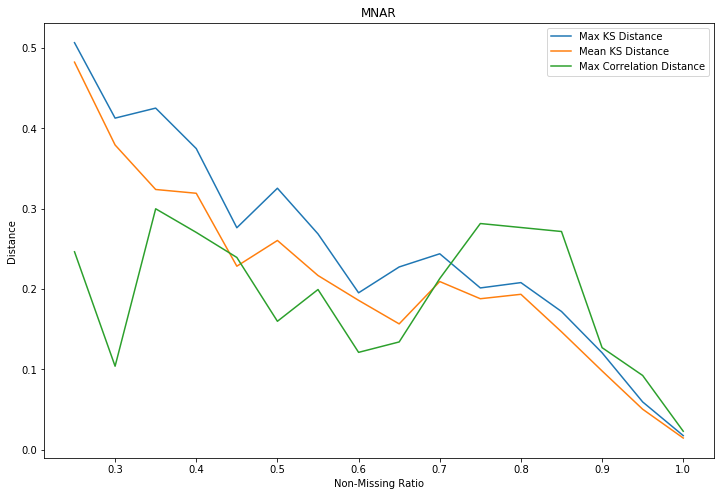

In [9]:
data = syn_dist.create_line(x_range=(0, 100), intercept=0, slope=0., y_std=100, size=10000)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=data)
plt.show()

results = dict()
for mechanism in ['MCAR', 'MAR', 'MNAR']:
    results[mechanism] = synthesize_and_plot_results(
        data, mechanism, n_iter=2500, std_noise = 2., start=25, end=100, step=5, n_experiments=3
    )


In [8]:
data = create_line(x_range=(0, 1000), intercept=0, slope=0.1, y_std=10, size=10000)
data.corr()

,x,y
x,1.000000,0.944888
y,0.944888,1.000000
